In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir(r"/Users/sk/Library/CloudStorage/GoogleDrive-sachinkumar.srinivasamurthy@sjsu.edu/Shared drives/DATA 228 Big Data/Project/data/AWS/redshift modeled tables/")
os.listdir()

['FLOOD_EVENTS.csv',
 'INSURANCE.csv',
 'COUNTY.csv',
 'FACT.csv',
 'WEATHER.csv',
 'WEATHER_STATIONS.csv',
 'CA_COUNTY_YEARLY_INSURANCE_STATS.csv']

In [23]:
dffact= pd.read_csv('FACT.csv')
dffact

,fips_code,date,year,floods_count,PRCP_min,PRCP_max,PRCP_mean,TEMP_min,TEMP_max,TEMP_mean,SNOW_min,SNOW_max,SNOW_mean,SNWD_min,SNWD_max,SNWD_mean
0,1,2005-01-03,2005,0,0,117,38,22,89,69,0,0,0,0,0,0
1,1,2005-01-04,2005,0,0,13,2,19,88,73,0,0,0,0,0,0
2,1,2005-01-05,2005,0,0,13,3,-122,92,55,0,0,0,0,0,0
3,1,2005-01-06,2005,0,0,109,12,-117,97,67,0,0,0,0,0,0
4,1,2005-01-07,2005,0,43,165,110,-356,108,58,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382639,115,2023-01-26,2023,0,0,0,0,122,125,123,0,0,0,0,0,0
382640,115,2023-01-27,2023,0,0,0,0,88,89,88,0,0,0,0,0,0
382641,115,2023-01-28,2023,0,0,0,0,75,75,75,0,0,0,0,0,0
382642,115,2023-01-29,2023,0,0,193,39,-8,66,29,0,0,0,0,0,0


In [3]:
dfcai= pd.read_csv('CA_COUNTY_YEARLY_INSURANCE_STATS.csv')
dfcai

,fips_code,year,log_insured,log_cost,policy_count
0,1,2009,21.8967,15.7562,11270
1,1,2009,21.8967,15.7562,1248
2,1,2009,21.8967,15.7562,366
3,1,2009,21.8967,15.7562,14202
4,1,2009,21.8967,15.7562,219
...,...,...,...,...,...
33609,99,2022,18.0049,12.6484,15
33610,99,2022,18.0049,12.6484,87
33611,99,2022,18.0049,12.6484,630
33612,99,2022,18.0049,12.6484,826


In [13]:
a= pd.DataFrame(dfcai.groupby('year')['policy_count'].sum())
a.reset_index(inplace=True)
a

,year,policy_count
0,2009,14104552
1,2010,13909532
2,2011,13513367
3,2012,12959471
4,2013,12389601
5,2014,11765586
6,2015,14488712
7,2016,12593588
8,2017,11878531
9,2018,11063710


In [17]:
(14104552-9706214)/14104552

0.3118381923793113

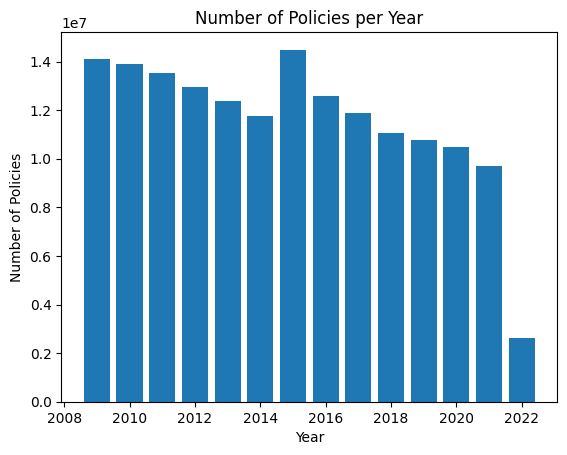

In [15]:
import matplotlib.pyplot as plt
plt.bar(a['year'], a['policy_count'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.title('Number of Policies per Year')

# Display the plot
plt.show()

In [19]:
a['yoy_percent_change'] = a['policy_count'].pct_change() * 100

a

,year,policy_count,yoy_percent_change
0,2009,14104552,NaN
1,2010,13909532,-1.382674
2,2011,13513367,-2.848155
3,2012,12959471,-4.098875
4,2013,12389601,-4.397325
5,2014,11765586,-5.036603
6,2015,14488712,23.144840
7,2016,12593588,-13.080003
8,2017,11878531,-5.677945
9,2018,11063710,-6.859611


In [22]:
(14104552-9706214)/14104552

0.3118381923793113

In [21]:
a[1:-1]['yoy_percent_change'].mean()

-2.7477141083720356

In [18]:
# Calculate the average year-on-year percentage decrease
n = len(a)
original_value = a.iloc[0]['policy_count']
new_value = a.iloc[-1]['policy_count']
average_yoy_percent_decrease = (100 / (n-1)) * (1 - (new_value / original_value)**(1/(n-1)))

print(f"Average year-on-year percentage decrease: {average_yoy_percent_decrease:.2f}%")

Average year-on-year percentage decrease: 0.93%
